### **0. Set-up**

In [1]:
# Import libraries and utils
%run '../../../utils.ipynb'

In [2]:
# Load NL predicted
raw_nl_pred = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/nl/f3.csv")

In [3]:
# Load EN predicted
raw_en_pred = pd.read_csv("../../../../data/gpt-3.5-turbo-0125/processed/en/f3.csv")

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [4]:
# Select first 25 word pairs
raw_nl_pred = raw_nl_pred.head(25)
raw_en_pred = raw_en_pred.head(25)

In [5]:
# Show results
raw_nl_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,gelukkig,vrolijk,6.47,6.67,5.0,7.82,5.0,3.33,4.68,5.48,3.57,6.67,4.23,5.0,7.14,6.67,5.29
1,hard,stoer,1.45,3.33,3.0,3.58,4.0,4.12,3.00,6.23,2.00,5.00,6.15,4.0,2.67,4.17,2.13
2,snel,razendsnel,7.85,10.00,8.0,9.53,7.0,9.45,7.83,9.30,8.00,10.00,9.74,9.0,9.37,10.00,9.34
3,gelukkig,blij,8.10,8.33,6.0,7.76,6.5,7.16,7.27,8.70,7.50,5.83,7.55,7.0,8.37,8.33,7.41
4,kort,lang,1.78,0.00,1.0,1.17,1.0,1.00,1.55,1.86,1.00,1.67,2.84,1.0,1.00,1.67,1.05
5,dom,stom,6.89,8.33,7.0,7.64,5.5,5.92,7.20,7.48,8.00,4.17,7.21,8.0,6.00,8.33,8.50
6,vreemd,eigenaardig,9.12,10.00,9.0,9.80,9.0,9.80,9.68,9.75,9.25,10.00,9.28,9.0,9.00,9.17,9.12
7,breed,smal,1.56,0.00,2.0,2.34,1.0,1.00,1.55,1.73,1.00,1.67,2.61,2.0,1.00,2.50,1.07
8,makkelijk,moeilijk,3.23,0.00,1.0,2.02,3.0,2.05,2.87,1.15,1.00,2.50,2.76,1.0,1.00,2.50,1.45
9,moeilijk,gemakkelijk,3.23,0.00,1.0,2.15,3.0,2.05,2.00,1.15,1.00,2.50,2.76,1.0,1.00,2.50,6.22


In [6]:
# Show results
raw_en_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,happy,cheerful,9.3,8.60,9.5,9.20,9.5,8.40,8.0,9.40,7.5,8.84,7.5,7.5,8.31,8.82,3.33
1,hard,easy,1.2,3.44,2.0,0.36,2.5,1.72,1.0,1.85,2.5,2.63,3.0,3.5,2.59,1.20,1.29
2,fast,rapid,9.8,9.80,9.5,9.20,9.8,9.40,9.5,9.90,8.5,9.58,9.5,9.0,9.68,9.20,9.68
3,happy,glad,8.9,9.20,8.5,9.20,8.5,7.20,7.0,9.60,8.0,9.50,8.0,8.5,8.14,8.82,6.00
4,short,long,3.4,2.00,2.0,8.77,1.5,3.12,3.0,8.92,2.5,5.69,2.0,5.0,1.73,7.00,5.67
5,stupid,dumb,9.7,8.88,9.0,9.20,9.2,8.70,9.0,9.50,8.0,9.69,9.0,9.5,8.52,9.80,9.59
6,weird,strange,8.9,9.70,9.5,9.57,8.8,8.80,8.0,9.20,8.5,9.21,8.5,8.5,8.94,8.80,8.51
7,wide,narrow,5.2,3.00,2.0,8.13,2.0,5.00,3.0,7.80,3.0,6.04,2.0,4.0,2.84,6.00,6.63
8,easy,difficult,1.1,7.34,2.0,0.36,3.5,3.20,2.0,2.30,4.0,8.11,1.5,5.0,3.16,3.20,5.10
9,hard,simple,3.2,3.56,3.0,8.13,2.2,3.60,2.0,4.55,2.5,7.28,2.5,3.0,2.87,4.50,2.55


### **1. Data Processing**

In [7]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
nl_pred['nl_pred_sl'] = nl_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
nl_pred['nl_pred_sd'] = nl_pred[similarity_cols].std(axis=1).round(2)

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl', 'nl_pred_sd']]

# Show results
nl_pred

,word1,word2,nl_pred_sl,nl_pred_sd
0,gelukkig,vrolijk,5.53,1.33
1,hard,stoer,3.66,1.40
2,snel,razendsnel,8.96,0.97
3,gelukkig,blij,7.45,0.86
4,kort,lang,1.31,0.63
5,dom,stom,7.08,1.22
6,vreemd,eigenaardig,9.40,0.39
7,breed,smal,1.54,0.70
8,makkelijk,moeilijk,1.84,0.96
9,moeilijk,gemakkelijk,2.10,1.46


In [8]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
en_pred['en_pred_sl'] = en_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
en_pred['en_pred_sd'] = en_pred[similarity_cols].std(axis=1).round(2)

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl', 'en_pred_sd']]

# Show results
en_pred

,word1,word2,en_pred_sl,en_pred_sd
0,happy,cheerful,8.25,1.54
1,hard,easy,2.05,0.93
2,fast,rapid,9.47,0.37
3,happy,glad,8.34,1.00
4,short,long,4.15,2.54
5,stupid,dumb,9.15,0.50
6,weird,strange,8.90,0.47
7,wide,narrow,4.44,2.11
8,easy,difficult,3.46,2.19
9,hard,simple,3.70,1.79


In [9]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,nl_pred_sd,word1,word2,en_pred_sl,en_pred_sd
0,gelukkig,vrolijk,5.53,1.33,happy,cheerful,8.25,1.54
1,hard,stoer,3.66,1.40,hard,easy,2.05,0.93
2,snel,razendsnel,8.96,0.97,fast,rapid,9.47,0.37
3,gelukkig,blij,7.45,0.86,happy,glad,8.34,1.00
4,kort,lang,1.31,0.63,short,long,4.15,2.54
5,dom,stom,7.08,1.22,stupid,dumb,9.15,0.50
6,vreemd,eigenaardig,9.40,0.39,weird,strange,8.90,0.47
7,breed,smal,1.54,0.70,wide,narrow,4.44,2.11
8,makkelijk,moeilijk,1.84,0.96,easy,difficult,3.46,2.19
9,moeilijk,gemakkelijk,2.10,1.46,hard,simple,3.70,1.79


### **2. Descriptive Statistics**

In [10]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Summary statistics standard deviations
nl_pred_sd_summary = round(nl_pred['nl_pred_sd'].describe(), 2)
en_pred_sd_summary = round(en_pred['en_pred_sd'].describe(), 2)

# Add median standard deviation
nl_pred_sd_summary['median'] = round(nl_pred['nl_pred_sd'].median(), 2)
en_pred_sd_summary['median'] = round(en_pred['en_pred_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary,
    "nl_pred_sd": nl_pred_sd_summary,
    "en_pred_sd": en_pred_sd_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,4.94,7.14,0.99,1.11
std,3.14,2.19,0.48,0.67
min,1.14,2.05,0.39,0.36
25%,1.74,5.66,0.64,0.50
50%,4.40,8.12,0.96,0.93
75%,7.70,8.90,1.22,1.57
max,9.40,9.47,2.63,2.54
median,4.40,8.12,0.96,0.93


#### **2.1. SimLex-999**

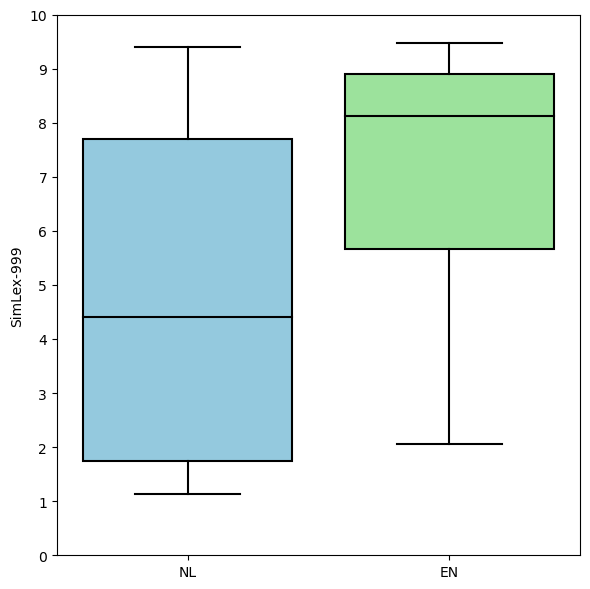

In [11]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **2.2. Standard Deviation**

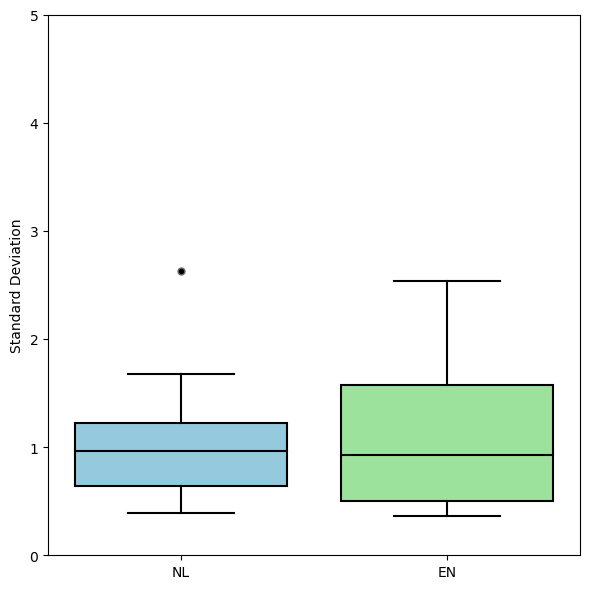

In [12]:
# Rename columns and copy
renamed_nl_pred_sd = nl_pred.rename(columns={"nl_pred_sd": "Standard Deviation"}).copy()
renamed_en_pred_sd = en_pred.rename(columns={"en_pred_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_nl_pred_sd['Score'] = 'NL'
renamed_en_pred_sd['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sd, renamed_en_pred_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

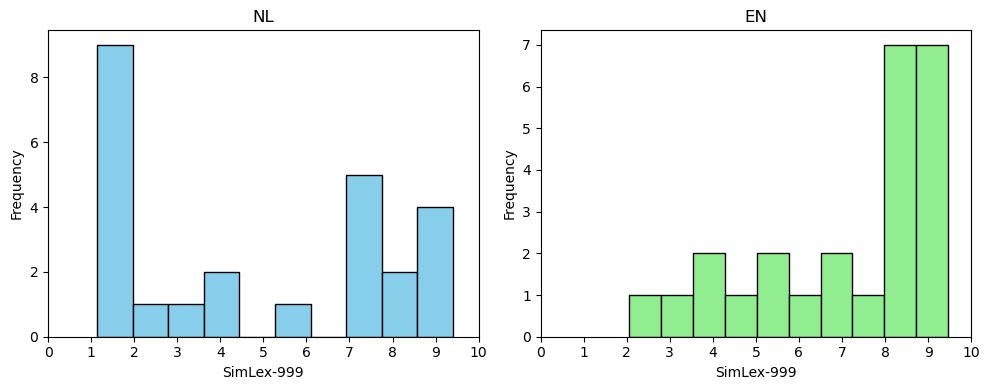

In [13]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

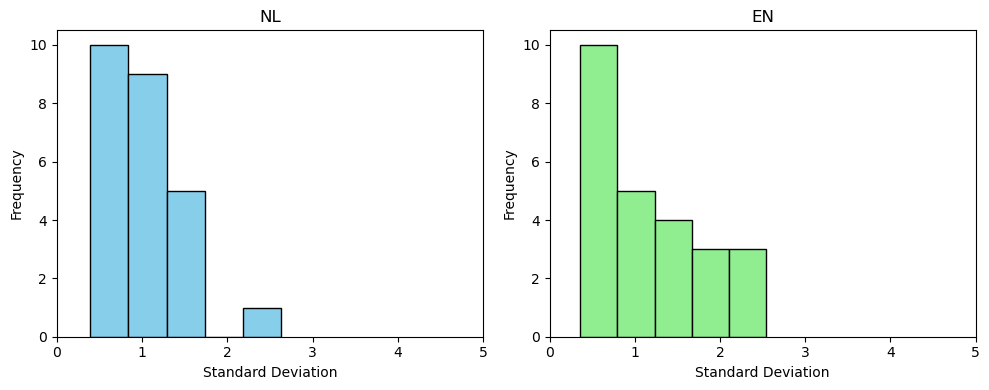

In [14]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [15]:
# Count outliers
print_outlier_counts(nl_pred)

Outliers in nl_pred_sd: 1
No outliers found in columns: nl_pred_sl


In [16]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sd')


Outliers in nl_pred_sd:
       word1   word2  nl_pred_sl  nl_pred_sd
14  moeilijk  simpel         4.4        2.63


#### **4.2. EN**

In [17]:
# Count outliers
print_outlier_counts(en_pred)

No outliers found in columns: en_pred_sl, en_pred_sd


In [18]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sd')

No outliers found in en_pred_sd


#### **4.3. Add to Summary**

In [19]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_nl_pred_sd = calculate_outliers(nl_pred, 'nl_pred_sd')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')
outliers_en_pred_sd = calculate_outliers(en_pred, 'en_pred_sd')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_nl_pred_sd = outliers_nl_pred_sd.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]
count_outliers_en_pred_sd = outliers_en_pred_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl, count_outliers_nl_pred_sd, count_outliers_en_pred_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,25.00,25.00,25.00,25.00
mean,4.94,7.14,0.99,1.11
std,3.14,2.19,0.48,0.67
min,1.14,2.05,0.39,0.36
25%,1.74,5.66,0.64,0.50
50%,4.40,8.12,0.96,0.93
75%,7.70,8.90,1.22,1.57
max,9.40,9.47,2.63,2.54
median,4.40,8.12,0.96,0.93
outliers,0.00,0.00,1.00,0.00


### **5. Correlation**

#### **5.1. SimLex-999 vs Standard Deviation**

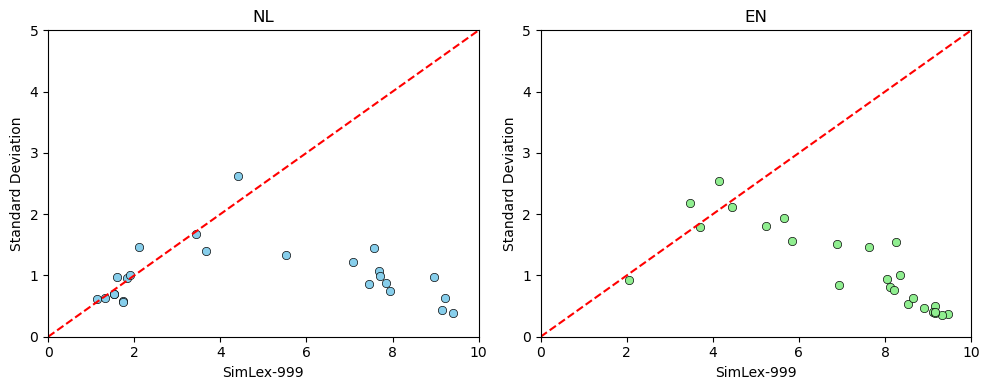

In [20]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='nl_pred_sl', y='nl_pred_sd', data=nl_pred, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('NL')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='en_pred_sl', y='en_pred_sd', data=en_pred, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('EN')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [21]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(conc, 'nl_pred_sl', 'nl_pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(conc, 'en_pred_sl', 'en_pred_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,nl_pred_sl,nl_pred_sd,0.03694,8.608248e-01,not significant
1,en_pred_sl,en_pred_sd,-0.88900,2.890786e-09,significant


### **6. Evaluation Metrics**

#### **6.1. Spearmans's Rank Correlation**

##### **6.1.1. NL SimLex-999 vs EN SimLex-999**

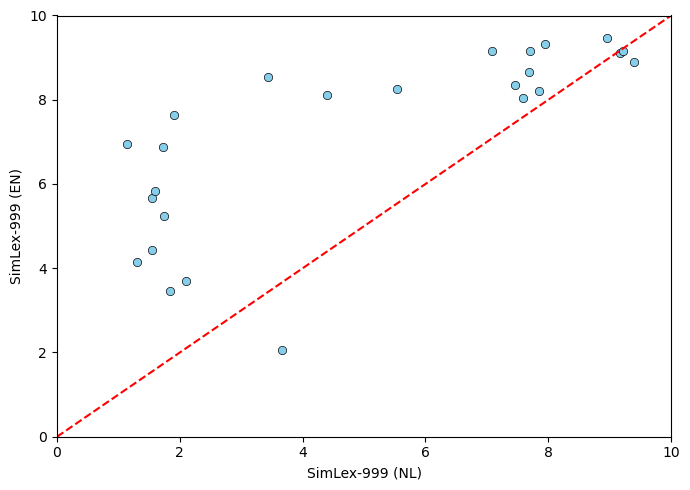

In [22]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [23]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.79223
P-value: 2.365845081360141e-06
The correlation is statistically significant.



##### **6.1.2. NL Standard Deviation vs EN Standard Deviation**

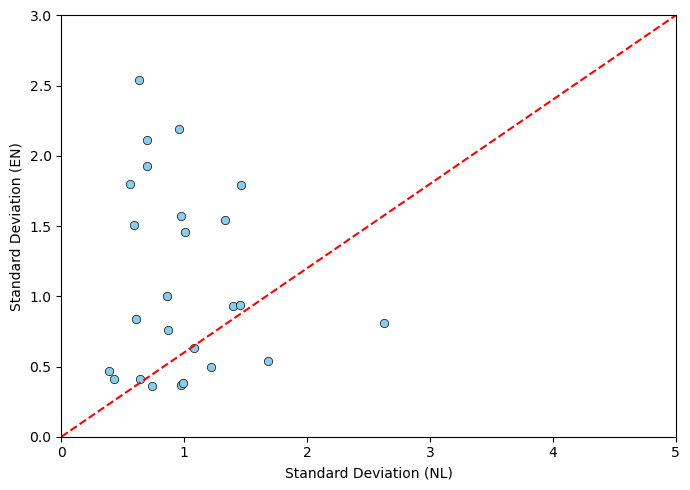

In [24]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sd', 'en_pred_sd', 'Standard Deviation (NL)', 'Standard Deviation (EN)', 0, 5, 0, 3)

In [25]:
# Correlation and p-value
print_correlation_and_pvalue(conc, 'nl_pred_sd', 'en_pred_sd')

Spearman's Rank correlation: -0.04657
P-value: 0.8250719463567959
The correlation is not statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [26]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 8.91


#### **7.3. Mean Absolute Error (MAE)**

In [27]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 2.37
